In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('/Users/sadimahfuz/Desktop/Gurpreet 620 Project/Motor_Vehicle_Collisions_-_Crashes.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44397 entries, 0 to 44396
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     44397 non-null  object 
 1   CRASH TIME                     44397 non-null  object 
 2   BOROUGH                        29086 non-null  object 
 3   ZIP CODE                       29080 non-null  float64
 4   LATITUDE                       40935 non-null  float64
 5   LONGITUDE                      40935 non-null  float64
 6   LOCATION                       40935 non-null  object 
 7   ON STREET NAME                 32326 non-null  object 
 8   CROSS STREET NAME              20500 non-null  object 
 9   OFF STREET NAME                12071 non-null  object 
 10  NUMBER OF PERSONS INJURED      44397 non-null  int64  
 11  NUMBER OF PERSONS KILLED       44397 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  44397 non-null 

In [46]:
df.drop_duplicates(inplace=True)

print("Number of records after removing duplicates:", len(df))

Number of records after removing duplicates: 44397


In [47]:
columns_of_interest = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']

filtered_df = df[columns_of_interest]


print(filtered_df)

       CRASH DATE CRASH TIME   BOROUGH   CONTRIBUTING FACTOR VEHICLE 1  \
0      09/11/2021       2:39       NaN    Aggressive Driving/Road Rage   
1      03/26/2022      11:45       NaN               Pavement Slippery   
2      06/29/2022       6:55       NaN           Following Too Closely   
3      09/11/2021       9:35  BROOKLYN                     Unspecified   
4      12/14/2021       8:13  BROOKLYN                             NaN   
...           ...        ...       ...                             ...   
44392  01/07/2022      17:00     BRONX   Failure to Yield Right-of-Way   
44393  01/07/2022      19:38       NaN   Failure to Yield Right-of-Way   
44394  01/07/2021      10:01     BRONX                     Unspecified   
44395  12/31/2021      16:30    QUEENS  Driver Inattention/Distraction   
44396  01/07/2022       9:45    QUEENS                       Failure t   

      CONTRIBUTING FACTOR VEHICLE 2  
0                       Unspecified  
1                               NaN

In [48]:
crash_frequency = len(df)
print("Overall Crash Frequency:", crash_frequency)

Overall Crash Frequency: 44397


In [49]:
crash_frequency_by_date = df['CRASH DATE'].value_counts().sort_index()

print(crash_frequency_by_date)

01/01/2021      1
01/01/2022    263
01/02/2021      2
01/02/2022    160
01/03/2021      3
             ... 
12/28/2021    215
12/29/2021    187
12/30/2021    211
12/31/2020      1
12/31/2021    225
Name: CRASH DATE, Length: 502, dtype: int64


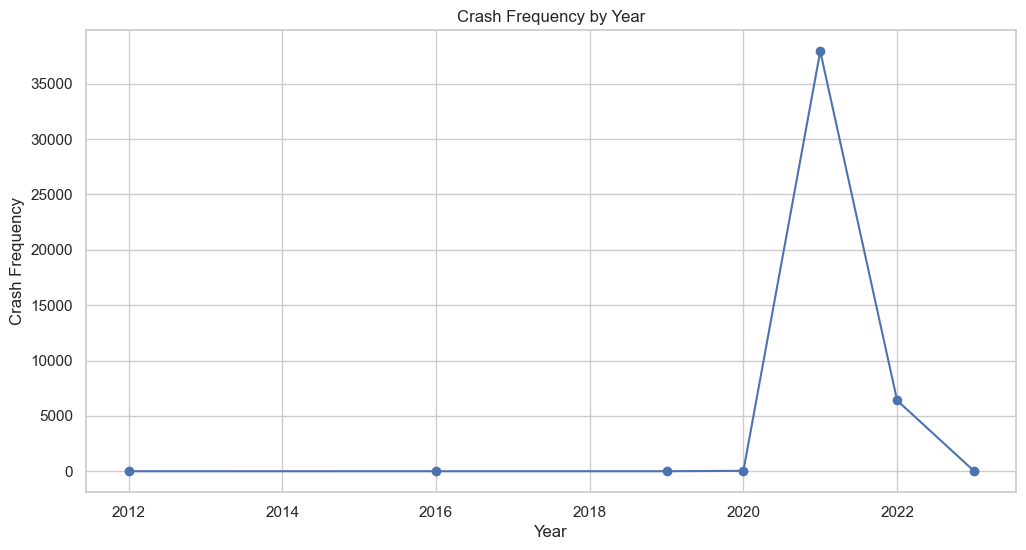

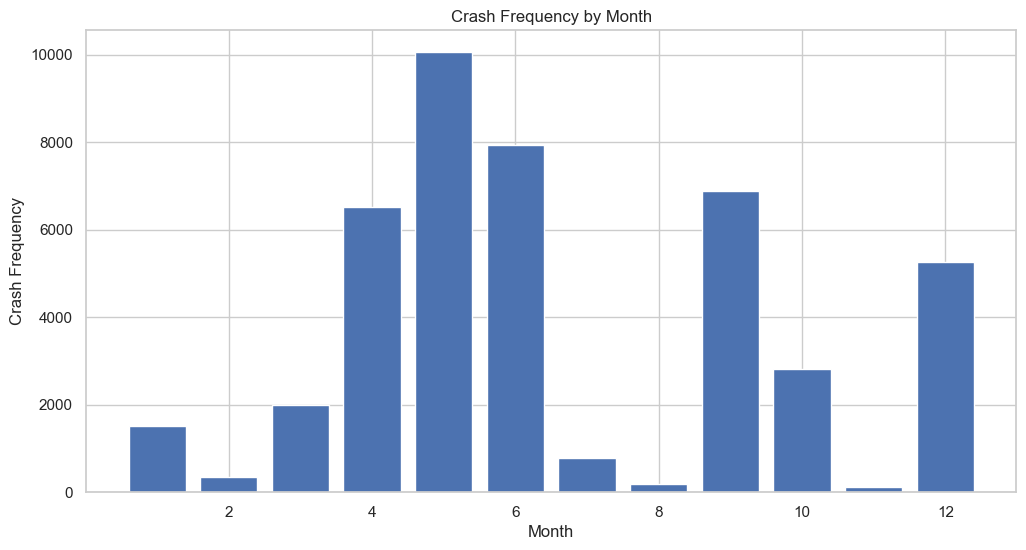

In [50]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month


crash_frequency_year = df['Year'].value_counts().sort_index()
crash_frequency_month = df['Month'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.plot(crash_frequency_year.index, crash_frequency_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Crash Frequency')
plt.title('Crash Frequency by Year')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(crash_frequency_month.index, crash_frequency_month.values)
plt.xlabel('Month')
plt.ylabel('Crash Frequency')
plt.title('Crash Frequency by Month')
plt.show()

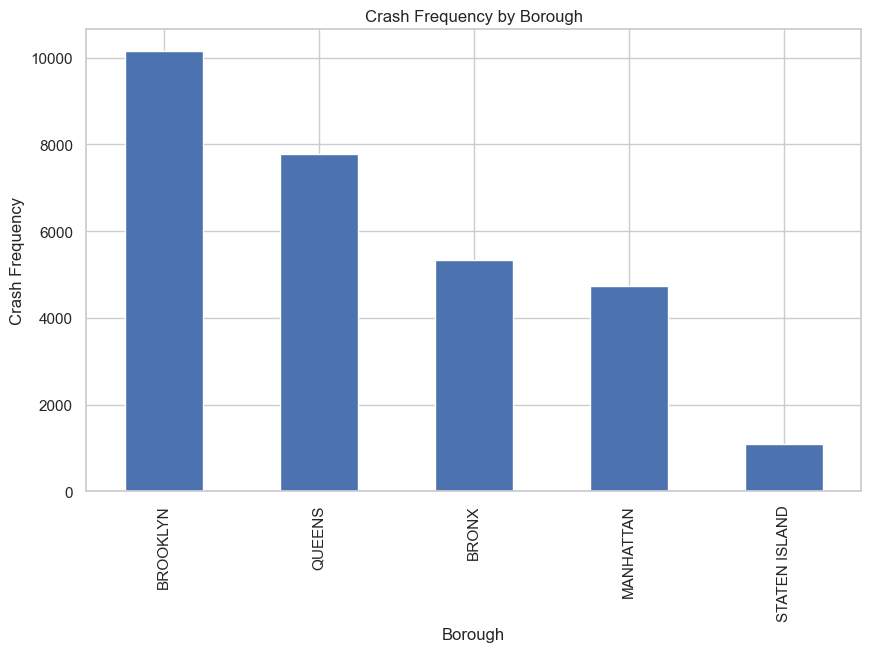

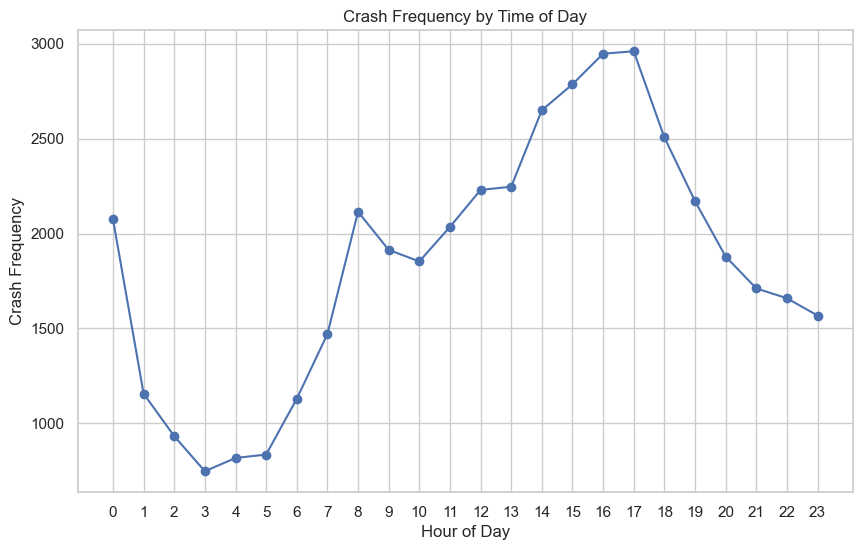

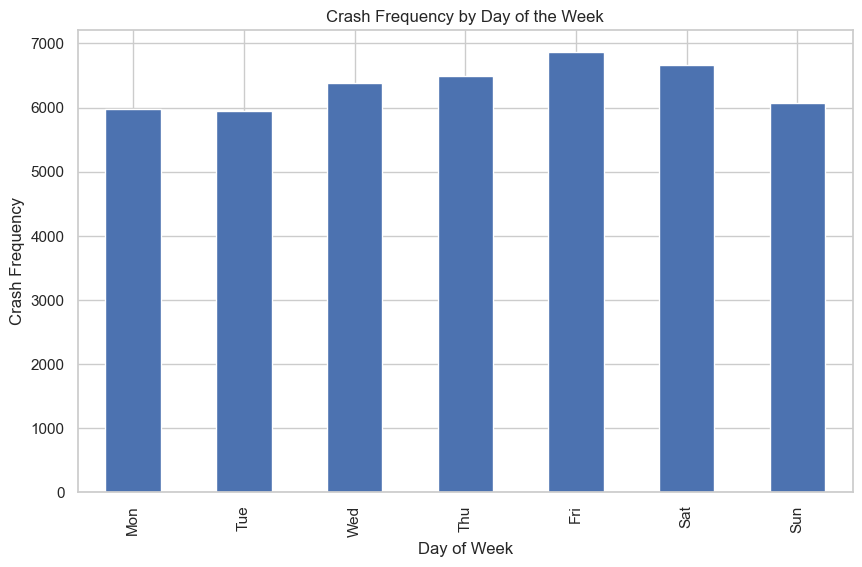

In [51]:
crash_frequency_borough = df['BOROUGH'].value_counts()

df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])
df['Hour'] = df['CRASH TIME'].dt.hour
crash_frequency_time_of_day = df['Hour'].value_counts().sort_index()


df['Day of Week'] = df['CRASH DATE'].dt.dayofweek
crash_frequency_day_of_week = df['Day of Week'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
crash_frequency_borough.plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Crash Frequency')
plt.title('Crash Frequency by Borough')
plt.show()


plt.figure(figsize=(10, 6))
crash_frequency_time_of_day.plot(kind='line', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Crash Frequency')
plt.title('Crash Frequency by Time of Day')
plt.xticks(range(24))
plt.show()


weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10, 6))
crash_frequency_day_of_week.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Crash Frequency')
plt.title('Crash Frequency by Day of the Week')
plt.xticks(range(7), weekday_labels)
plt.show()

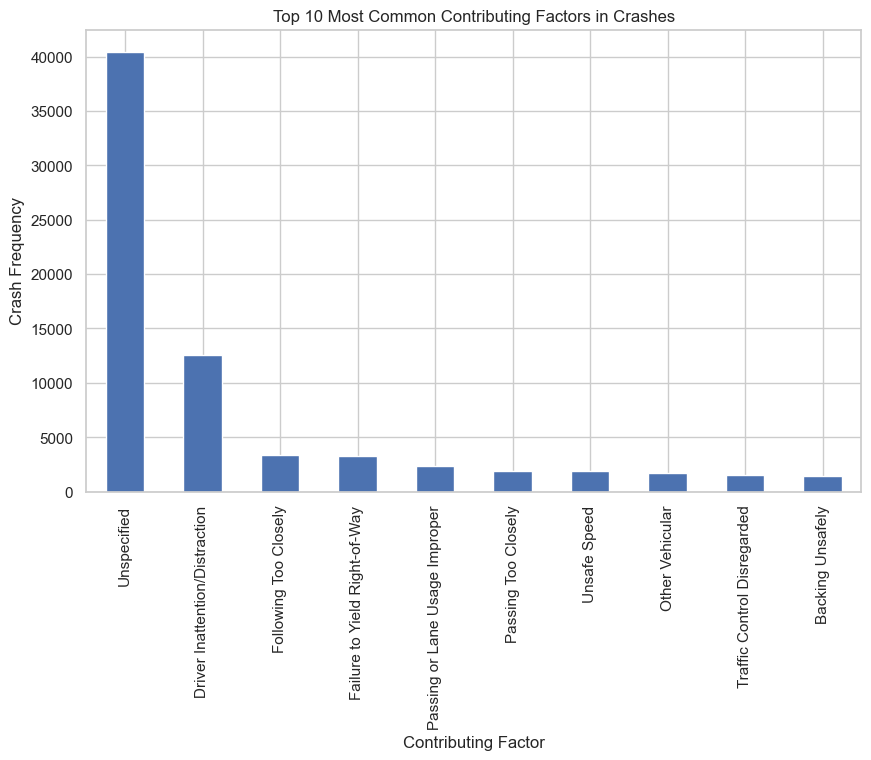

Top 10 Most Common Contributing Factors:
Unspecified                       40444
Driver Inattention/Distraction    12555
Following Too Closely              3403
Failure to Yield Right-of-Way      3323
Passing or Lane Usage Improper     2401
Passing Too Closely                1880
Unsafe Speed                       1860
Other Vehicular                    1700
Traffic Control Disregarded        1509
Backing Unsafely                   1429
dtype: int64


In [52]:
contributing_factors = pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'], df['CONTRIBUTING FACTOR VEHICLE 2']], axis=0)


contributing_factor_counts = contributing_factors.value_counts()


plt.figure(figsize=(10, 6))
top_contributing_factors = contributing_factor_counts.head(10)
top_contributing_factors.plot(kind='bar')
plt.xlabel('Contributing Factor')
plt.ylabel('Crash Frequency')
plt.title('Top 10 Most Common Contributing Factors in Crashes')
plt.show()

print("Top 10 Most Common Contributing Factors:")
print(top_contributing_factors)

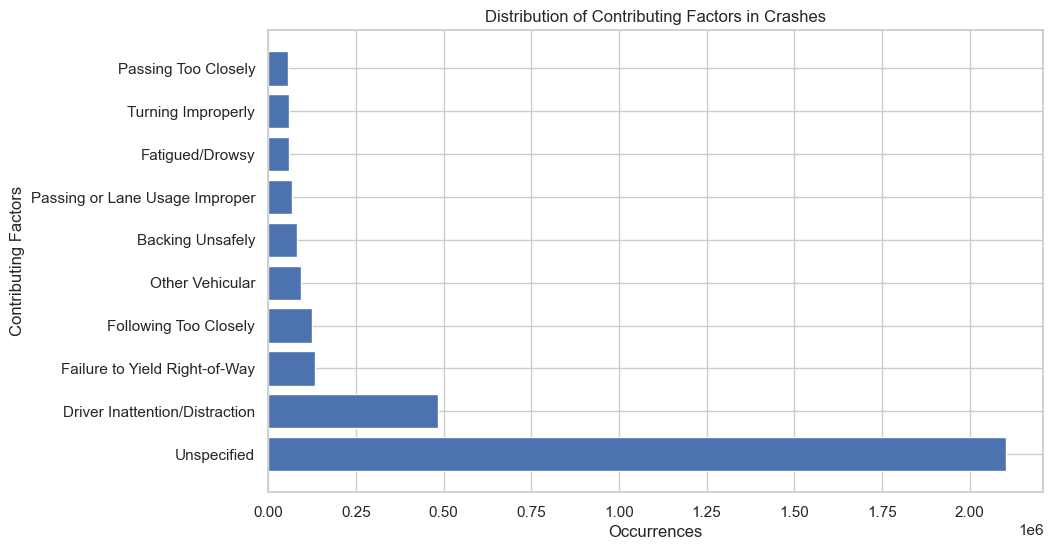

In [53]:
contributing_factors = [
    'Unspecified',
    'Driver Inattention/Distraction',
    'Failure to Yield Right-of-Way',
    'Following Too Closely',
    'Other Vehicular',
    'Backing Unsafely',
    'Passing or Lane Usage Improper',
    'Fatigued/Drowsy',
    'Turning Improperly',
    'Passing Too Closely'
]

occurrences = [
    2105040,
    483714,
    133770,
    123376,
    92779,
    81855,
    66250,
    58151,
    57752,
    57171
]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(contributing_factors, occurrences)
plt.xlabel('Occurrences')
plt.ylabel('Contributing Factors')
plt.title('Distribution of Contributing Factors in Crashes')

plt.show()

In [54]:
categorical_columns = ['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the one-hot encoded dataset
print(one_hot_encoded.head())

  CRASH DATE          CRASH TIME  ZIP CODE   LATITUDE  LONGITUDE  \
0 2021-09-11 2023-12-20 02:39:00       NaN        NaN        NaN   
1 2022-03-26 2023-12-20 11:45:00       NaN        NaN        NaN   
2 2022-06-29 2023-12-20 06:55:00       NaN        NaN        NaN   
3 2021-09-11 2023-12-20 09:35:00   11208.0  40.667202 -73.866500   
4 2021-12-14 2023-12-20 08:13:00   11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  NUMBER OF PERSONS INJURED  ...  \
0                      NaN                          2  ...   
1                      NaN  

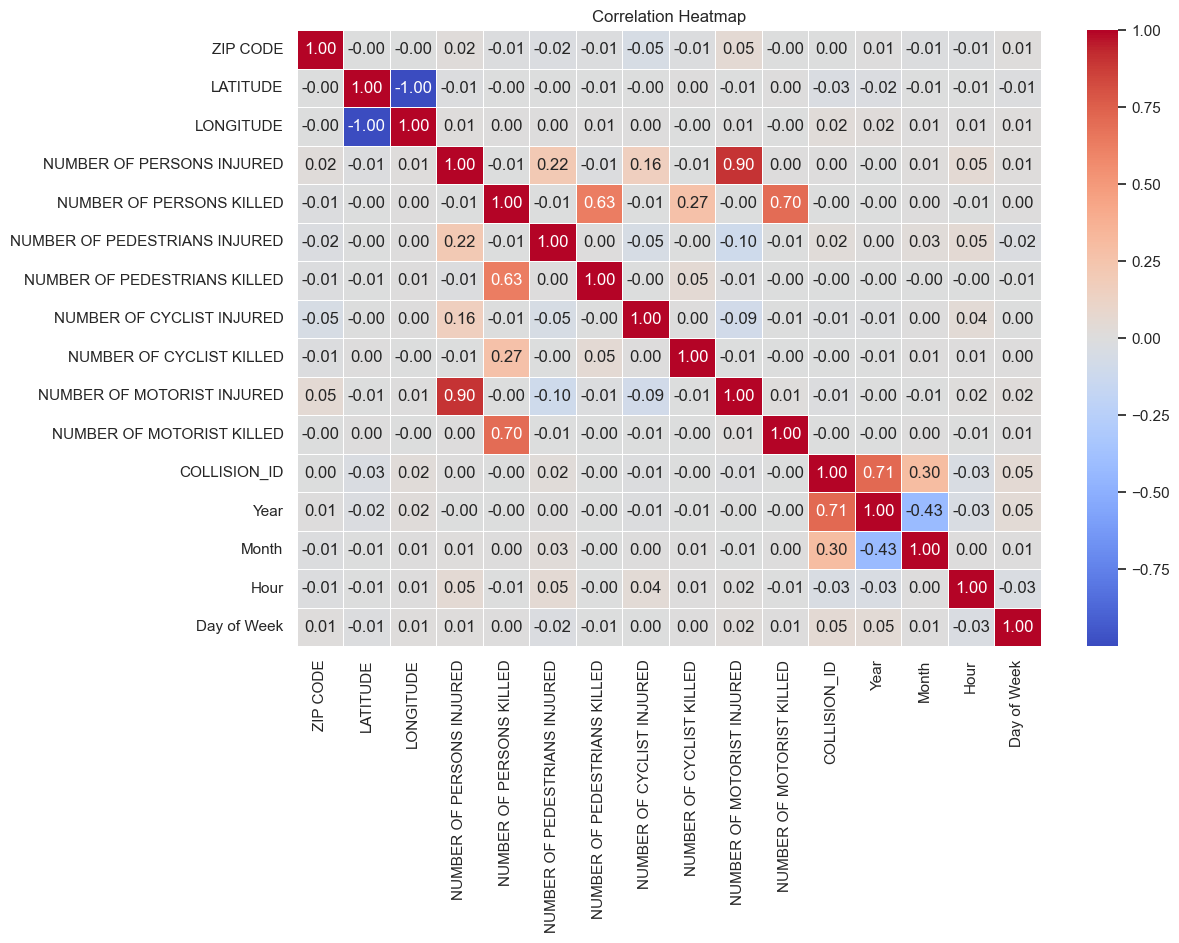

In [55]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numerical_columns.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [56]:
target_variable = 'NUMBER OF PERSONS INJURED'
predictor_variables = ['NUMBER OF MOTORIST INJURED', 'NUMBER OF PEDESTRIANS INJURED']


data_subset = df[[target_variable] + predictor_variables]


data_subset.dropna(inplace=True)


X = data_subset[predictor_variables]
y = data_subset[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


r2_score = model.score(X_test, y_test)
print("R-squared Score:", r2_score)

R-squared Score: 0.9053541806651705


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = '/Users/sadimahfuz/Desktop/Gurpreet 620 Project/Motor_Vehicle_Collisions_-_Crashes.csv'
df = pd.read_csv(file_path)

# Selecting a subset of the dataset for the analysis
# Target variable and predictor variables
target_variable = 'NUMBER OF PERSONS INJURED'
predictor_variables = ['NUMBER OF MOTORIST INJURED', 'NUMBER OF PEDESTRIANS INJURED']

# Creating a subset of data
data_subset = df[[target_variable] + predictor_variables]

# Preprocessing
data_subset.dropna(inplace=True)

# Splitting the data into training and testing sets
X = data_subset[predictor_variables]
y = data_subset[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
random_forest_model = RandomForestRegressor()

# Training the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Making predictions
linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
rf_predictions = random_forest_model.predict(X_test)

# Evaluating the models
linear_mse = mean_squared_error(y_test, linear_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

linear_r2 = r2_score(y_test, linear_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Organizing results in a dictionary
results = {
    "Linear Regression": {"MSE": linear_mse, "R2": linear_r2},
    "Ridge Regression": {"MSE": ridge_mse, "R2": ridge_r2},
    "Lasso Regression": {"MSE": lasso_mse, "R2": lasso_r2},
    "Random Forest": {"MSE": rf_mse, "R2": rf_r2}
}

results

{'Linear Regression': {'MSE': 0.06137593855167606, 'R2': 0.9053541806651705},
 'Ridge Regression': {'MSE': 0.06137599899734236, 'R2': 0.9053540874538935},
 'Lasso Regression': {'MSE': 0.6484953735541836, 'R2': -2.341981629783163e-05},
 'Random Forest': {'MSE': 0.062342683183976594, 'R2': 0.9038633955143317}}

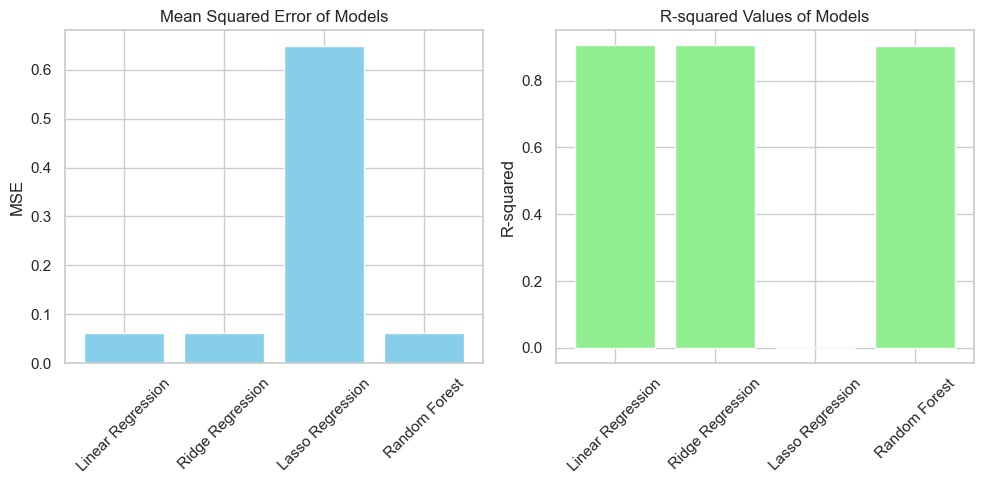

In [58]:
import matplotlib.pyplot as plt

# Extracting MSE and R2 values for plotting
models = results.keys()
mse_values = [results[model]['MSE'] for model in models]
r2_values = [results[model]['R2'] for model in models]

# Plotting Mean Squared Error for each model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error of Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plotting R-squared values for each model
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R-squared Values of Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [59]:
import pandas as pd

# Load the dataset
file_path = '/Users/sadimahfuz/Desktop/Motor_Vehicle_Collisions_-_Crashes.csv'
data = pd.read_csv(file_path)

column_types = {'ZIP CODE': str, 'CONTRIBUTING FACTOR VEHICLE 3': str,
                'CONTRIBUTING FACTOR VEHICLE 4': str, 'CONTRIBUTING FACTOR VEHICLE 5': str,
                'VEHICLE TYPE CODE 3': str, 'VEHICLE TYPE CODE 4': str, 'VEHICLE TYPE CODE 5': str}
collision_data = pd.read_csv(file_path, dtype=column_types)



file_path = '/Users/sadimahfuz/Desktop/Motor_Vehicle_Collisions_-_Crashes.csv'
data = pd.read_csv(file_path, low_memory=False)



file_path = '/Users/sadimahfuz/Desktop/Motor_Vehicle_Collisions_-_Crashes.csv'  # Replace with your actual file path
data = pd.read_csv(file_path, dtype={3: str})


# Display the first few rows of the dataset to understand its structure
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609.0,NaN,NaN,NaN,NaN,NaN


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Setting up the visualisation theme
sns.set(style="whitegrid")

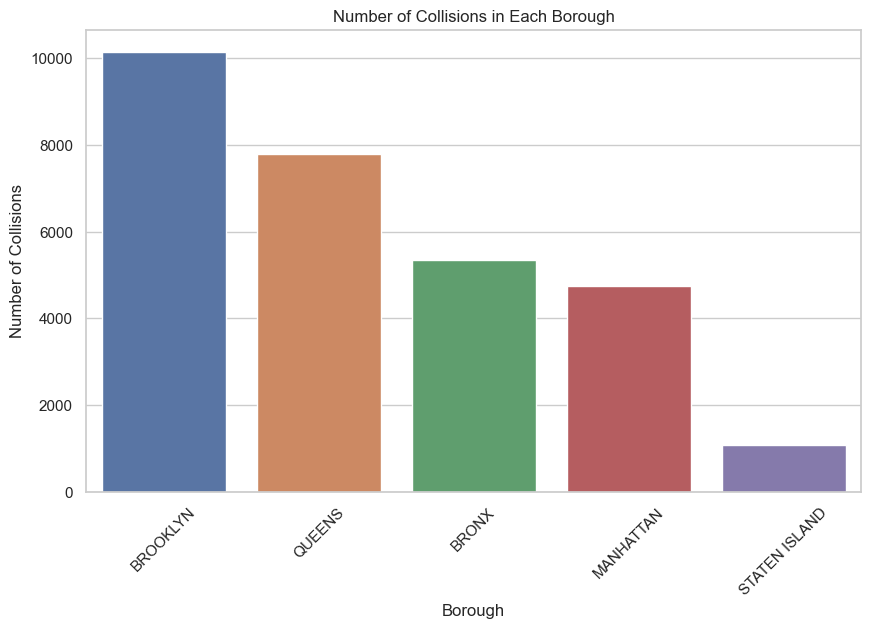

In [62]:
# Bar Chart: Number of Collisions in Each Borough
borough_collision_counts = data['BOROUGH'].value_counts()
plt.figure(figsize=(10, 6))
borough_collision_bar = sns.barplot(x=borough_collision_counts.index, y=borough_collision_counts.values)
borough_collision_bar.set_title('Number of Collisions in Each Borough')
borough_collision_bar.set_xlabel('Borough')
borough_collision_bar.set_ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()

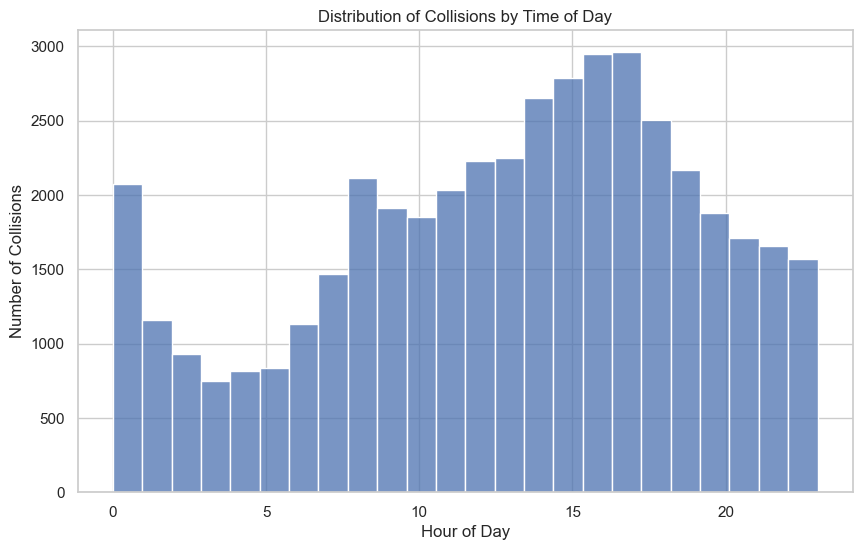

In [63]:
# Histogram: Time of Day for Collisions
# Converting CRASH TIME to a datetime object to extract the hour
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M', errors='coerce')
data['CRASH HOUR'] = data['CRASH TIME'].dt.hour
plt.figure(figsize=(10, 6))
time_histogram = sns.histplot(data['CRASH HOUR'].dropna(), bins=24, kde=False)
time_histogram.set_title('Distribution of Collisions by Time of Day')
time_histogram.set_xlabel('Hour of Day')
time_histogram.set_ylabel('Number of Collisions')
plt.show()


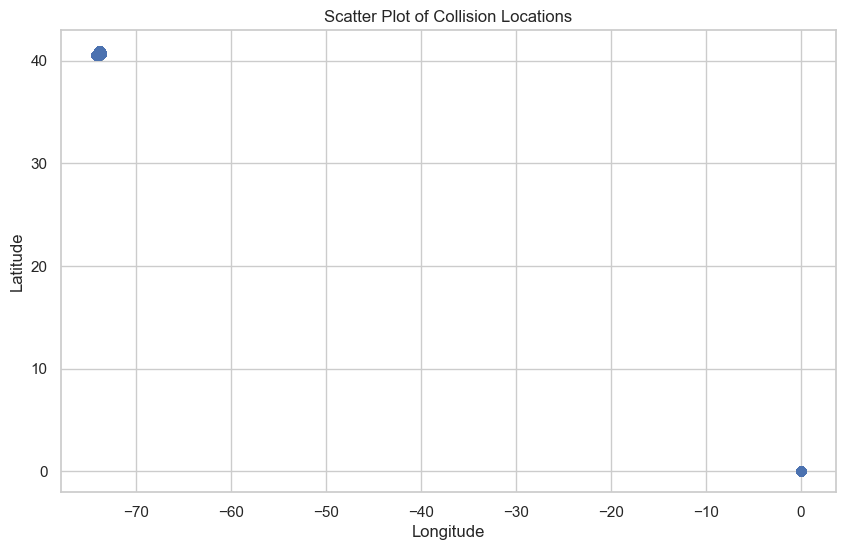

In [64]:
# Scatter Plot: Collision Locations
# Filtering out entries with missing or invalid coordinates
valid_locations = data.dropna(subset=['LATITUDE', 'LONGITUDE'])
plt.figure(figsize=(10, 6))
location_scatter = plt.scatter(valid_locations['LONGITUDE'], valid_locations['LATITUDE'], alpha=0.5)
plt.title('Scatter Plot of Collision Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

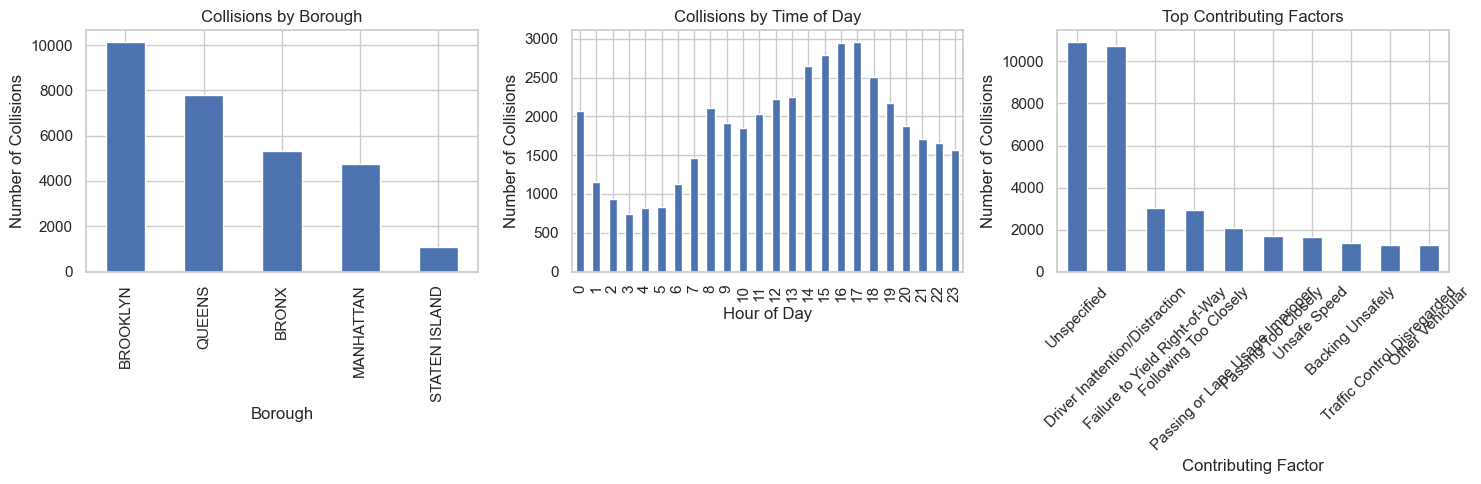

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Exploratory Data Analysis
# 1. Distribution of collisions across boroughs
borough_counts = data['BOROUGH'].value_counts()

# 2. Distribution of collisions across different times of the day
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour
time_counts = data['CRASH TIME'].value_counts().sort_index()

# 3. Top contributing factors
factor_counts = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

# Plotting
plt.figure(figsize=(15, 5))

# Plot for distribution of collisions across boroughs
plt.subplot(1, 3, 1)
borough_counts.plot(kind='bar')
plt.title('Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')

# Plot for distribution of collisions across different times of the day
plt.subplot(1, 3, 2)
time_counts.plot(kind='bar')
plt.title('Collisions by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions')

# Plot for top contributing factors
plt.subplot(1, 3, 3)
factor_counts.plot(kind='bar')
plt.title('Top Contributing Factors')
plt.xlabel('Contributing Factor')
plt.xticks(rotation=45)
plt.ylabel('Number of Collisions')

plt.tight_layout()
plt.show()


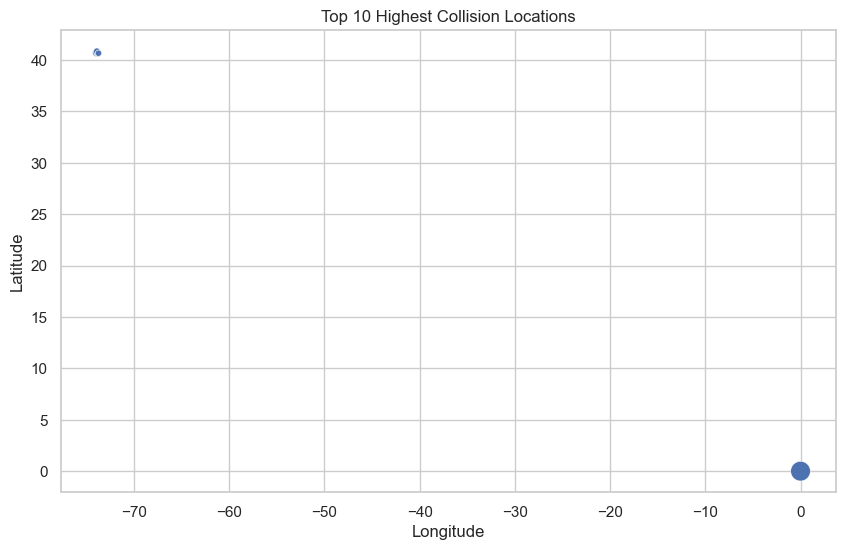

,LATITUDE,LONGITUDE,counts
0,0.000000,0.000000,258
8522,40.675735,-73.896860,29
6237,40.658577,-73.890630,24
10784,40.691680,-73.999344,21
22815,40.826275,-73.859710,18
8915,40.678160,-73.897484,17
6953,40.664960,-73.822260,17
25338,40.861862,-73.912820,17
6989,40.665257,-73.739555,17
7047,40.665520,-73.744670,16


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out rows where latitude or longitude is missing
collision_data_filtered = collision_data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Grouping the data by location and counting the number of collisions
location_counts = collision_data_filtered.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='counts')

# Sorting to find the locations with the highest number of collisions
top_locations = location_counts.sort_values(by='counts', ascending=False).head(10)

# Plotting the top locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_locations, x='LONGITUDE', y='LATITUDE', size='counts', legend=False, sizes=(20, 200))
plt.title('Top 10 Highest Collision Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

top_locations


In [67]:
# Load the data from the CSV file
file_path = '/Users/sadimahfuz/Desktop/Motor_Vehicle_Collisions_-_Crashes.csv'
collision_data = pd.read_csv(file_path)

# Display basic information about the dataset
collision_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44397 entries, 0 to 44396
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     44397 non-null  object 
 1   CRASH TIME                     44397 non-null  object 
 2   BOROUGH                        29086 non-null  object 
 3   ZIP CODE                       29080 non-null  float64
 4   LATITUDE                       40935 non-null  float64
 5   LONGITUDE                      40935 non-null  float64
 6   LOCATION                       40935 non-null  object 
 7   ON STREET NAME                 32326 non-null  object 
 8   CROSS STREET NAME              20500 non-null  object 
 9   OFF STREET NAME                12071 non-null  object 
 10  NUMBER OF PERSONS INJURED      44397 non-null  int64  
 11  NUMBER OF PERSONS KILLED       44397 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  44397 non-null 

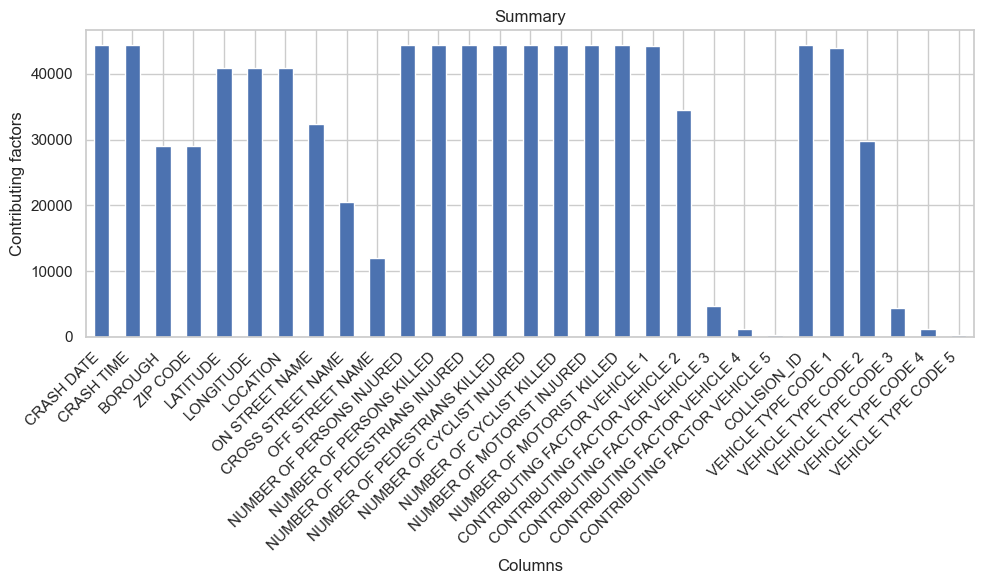

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = '/Users/sadimahfuz/Desktop/Motor_Vehicle_Collisions_-_Crashes.csv'
collision_data = pd.read_csv(file_path)

# Count non-null entries in each column
nonnull_counts = collision_data.notnull().sum()

# Plotting
plt.figure(figsize=(10, 6))
nonnull_counts.plot(kind='bar')
plt.title('Summary')
plt.xlabel('Columns')
plt.ylabel('Contributing factors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [69]:
# Dropping rows where 'VEHICLE TYPE CODE 1' or 'BOROUGH' is missing
cleaned_data = data.dropna(subset=['VEHICLE TYPE CODE 1', 'BOROUGH'])

# We will now count the frequency of each vehicle type in each borough
vehicle_location_frequency = cleaned_data.groupby(['BOROUGH', 'VEHICLE TYPE CODE 1']).size().unstack(fill_value=0)

# Display the first few rows of the resulting dataframe
vehicle_location_frequency.head()


VEHICLE TYPE CODE 1,12 passage,2 dr sedan,3-Door,4 dr sedan,50cc Scoot,AMB,AMBU,AMBULACE,AMBULANCE,AMBULANE,...,dump,fire truck,forklift,freight,kick scoot,moped,scooter,trailer,van,�MBU
BOROUGH,,,,,,,,,,,,,,,,,,,,,
BRONX,0,0,3,4,0,0,0,0,10,0,...,0,0,0,0,0,1,0,0,0,0
BROOKLYN,1,0,5,8,1,1,2,0,9,1,...,0,1,0,1,0,0,0,1,1,1
MANHATTAN,0,0,6,3,0,2,0,1,8,0,...,0,0,1,0,1,0,1,0,2,0
QUEENS,0,3,1,8,0,1,0,0,4,0,...,1,0,0,0,0,0,1,0,0,0
STATEN ISLAND,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
import pandas as pd

# Load the data from the provided file
file_path = '/Users/sadimahfuz/Desktop/Motor_Vehicle_Collisions_-_Crashes.csv'
data = pd.read_csv(file_path)

# Dropping rows where 'VEHICLE TYPE CODE 1' or 'BOROUGH' is missing
cleaned_data = data.dropna(subset=['VEHICLE TYPE CODE 1', 'BOROUGH'])

# Counting the frequency of each vehicle type in each borough
vehicle_location_frequency = cleaned_data.groupby(['BOROUGH', 'VEHICLE TYPE CODE 1']).size().unstack(fill_value=0)

# Display the first few rows of the resulting dataframe
vehicle_location_frequency.head()


VEHICLE TYPE CODE 1,12 passage,2 dr sedan,3-Door,4 dr sedan,50cc Scoot,AMB,AMBU,AMBULACE,AMBULANCE,AMBULANE,...,dump,fire truck,forklift,freight,kick scoot,moped,scooter,trailer,van,�MBU
BOROUGH,,,,,,,,,,,,,,,,,,,,,
BRONX,0,0,3,4,0,0,0,0,10,0,...,0,0,0,0,0,1,0,0,0,0
BROOKLYN,1,0,5,8,1,1,2,0,9,1,...,0,1,0,1,0,0,0,1,1,1
MANHATTAN,0,0,6,3,0,2,0,1,8,0,...,0,0,1,0,1,0,1,0,2,0
QUEENS,0,3,1,8,0,1,0,0,4,0,...,1,0,0,0,0,0,1,0,0,0
STATEN ISLAND,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [72]:
import folium
from folium.plugins import HeatMap

# Filter out rows where latitude or longitude is missing
accident_locations = collision_data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Sample a subset of the collision_data to avoid overloading the map, if the collision_data is very large
sampled_collision_data = accident_locations.sample(min(10000, len(accident_locations)), random_state=1)

# Create a base map
map = folium.Map(location=[sampled_collision_data['LATITUDE'].mean(), sampled_collision_data['LONGITUDE'].mean()], zoom_start=11)

# Add a heat map layer
HeatMap(collision_data=sampled_collision_data[['LATITUDE', 'LONGITUDE']], radius=10).add_to(map)

# Display the map
map.save('/mnt/collision_data/accident_heatmap.html')
map_path = '/mnt/collision_data/accident_heatmap.html'
map_path


TypeError: __init__() missing 1 required positional argument: 'data'

In [81]:
accident_locations = collision_data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Sample a subset of the data to avoid overloading the map, if the data is very large
sampled_data = accident_locations.sample(min(10000, len(accident_locations)), random_state=1)

# Create a base map
map = folium.Map(location=[sampled_data['LATITUDE'].mean(), sampled_data['LONGITUDE'].mean()], zoom_start=11)

# Add a heat map layer
HeatMap(sampled_data[['LATITUDE', 'LONGITUDE']].values.tolist(), radius=10).add_to(map)

# Save the map
#map.save('/mnt/data/accident_heatmap.html')

In [82]:
map

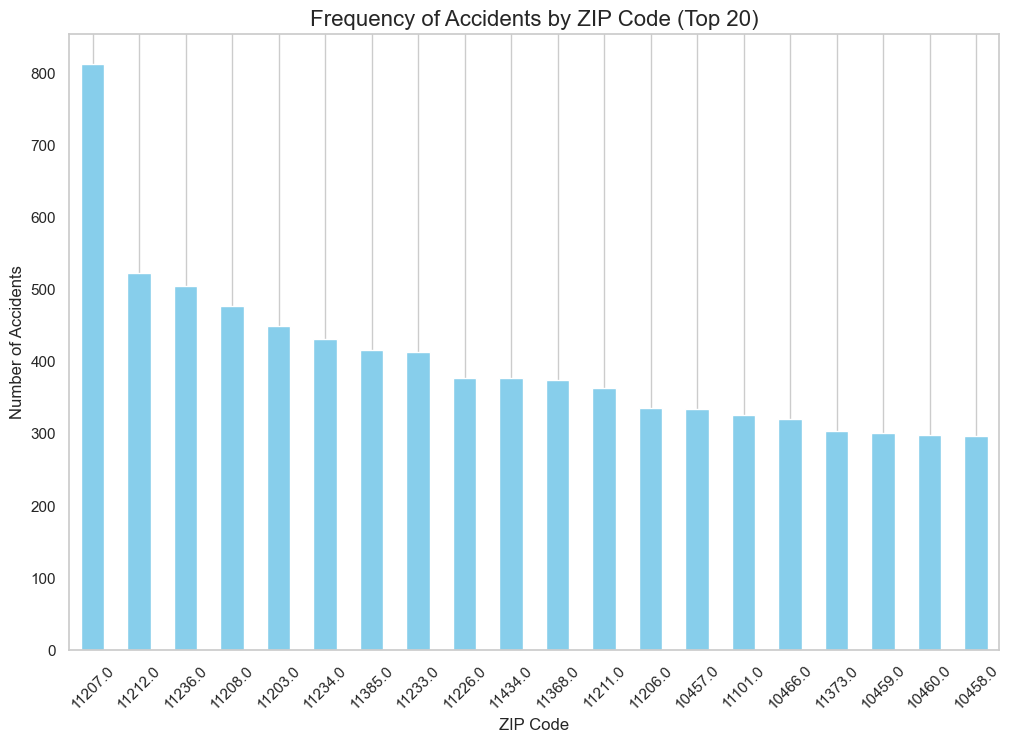

In [74]:
accident_counts_by_zip = collision_data['ZIP CODE'].value_counts().sort_values(ascending=False)

# Limiting to the top 20 ZIP codes for clarity in visualization
top_zip_codes = accident_counts_by_zip.head(20)

# Creating the bar plot
plt.figure(figsize=(12, 8))
top_zip_codes.plot(kind='bar', color='skyblue')
plt.title('Frequency of Accidents by ZIP Code (Top 20)', fontsize=16)
plt.xlabel('ZIP Code', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Displaying the plot
plt.show()

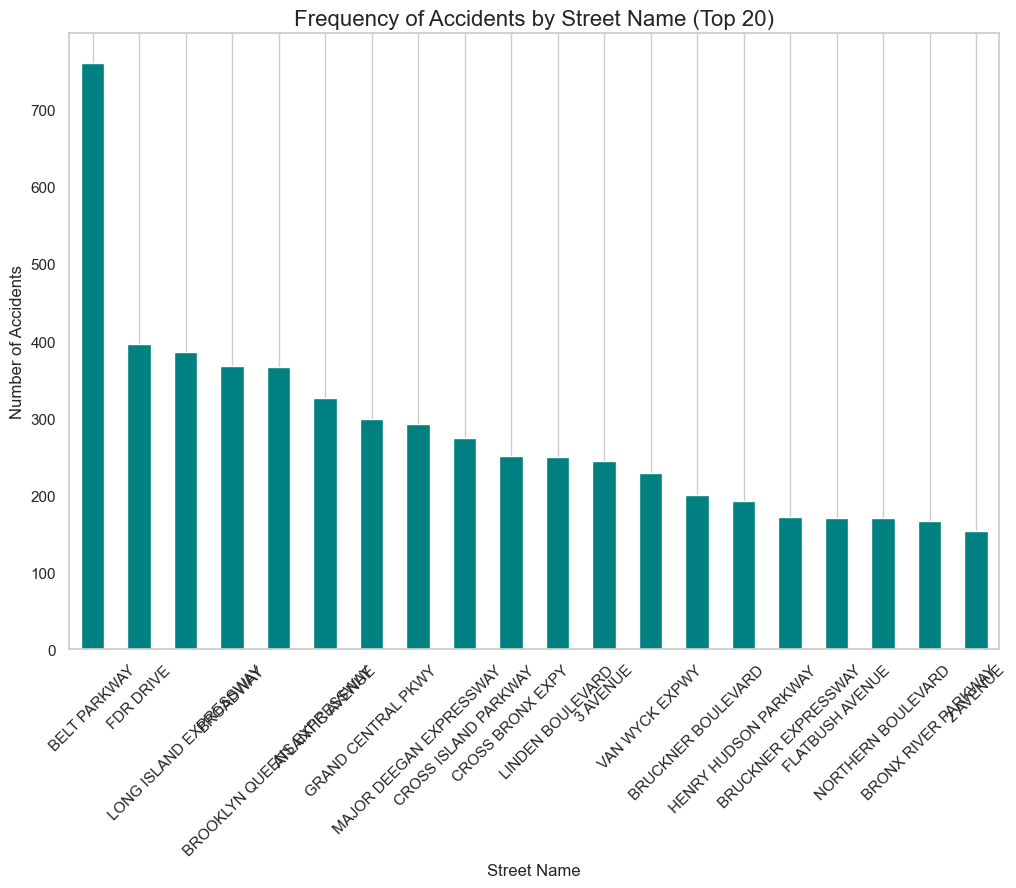

In [75]:
# Grouping the data by street name and counting the number of accidents
# Considering both 'ON STREET NAME' and 'OFF STREET NAME' for a comprehensive view
on_street_accidents = collision_data['ON STREET NAME'].value_counts()
off_street_accidents = collision_data['OFF STREET NAME'].value_counts()

# Combining the counts from both columns
total_street_accidents = on_street_accidents.add(off_street_accidents, fill_value=0).sort_values(ascending=False)

# Limiting to the top 20 streets for clarity in visualization
top_streets = total_street_accidents.head(20)

# Creating the bar plot
plt.figure(figsize=(12, 8))
top_streets.plot(kind='bar', color='teal')
plt.title('Frequency of Accidents by Street Name (Top 20)', fontsize=16)
plt.xlabel('Street Name', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Displaying the plot
plt.show()


In [76]:
# Renaming the data to 'collision_data' for clarity
collision_data = data

# Analyzing the frequency of the number of people injured in each accident
injury_counts = collision_data['NUMBER OF PERSONS INJURED'].value_counts().sort_index()

# Displaying the frequency data
injury_counts.head(10)  # Displaying the first 10 entries for an overview


0    28722
1    12182
2     2342
3      728
4      263
5       91
6       39
7       14
8        6
9        6
Name: NUMBER OF PERSONS INJURED, dtype: int64

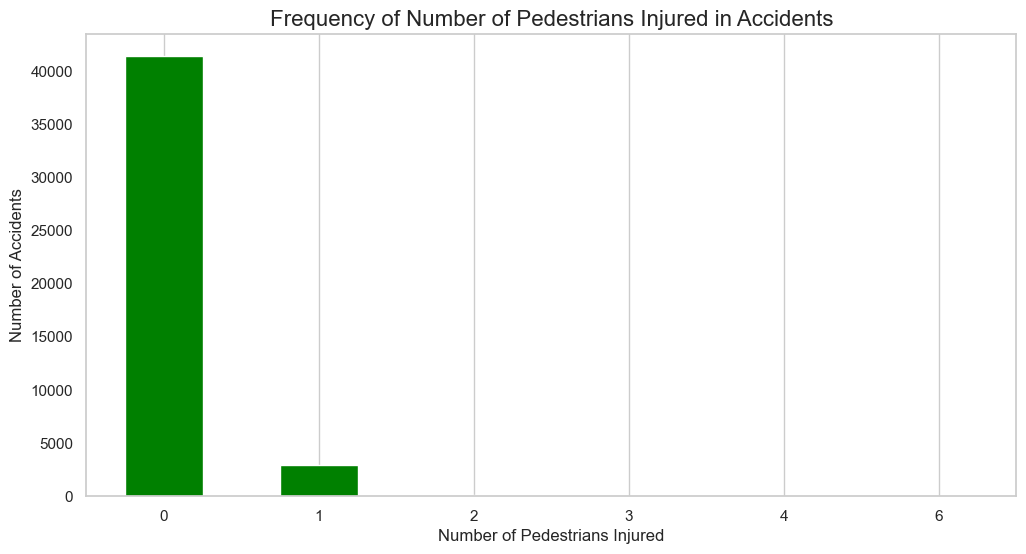

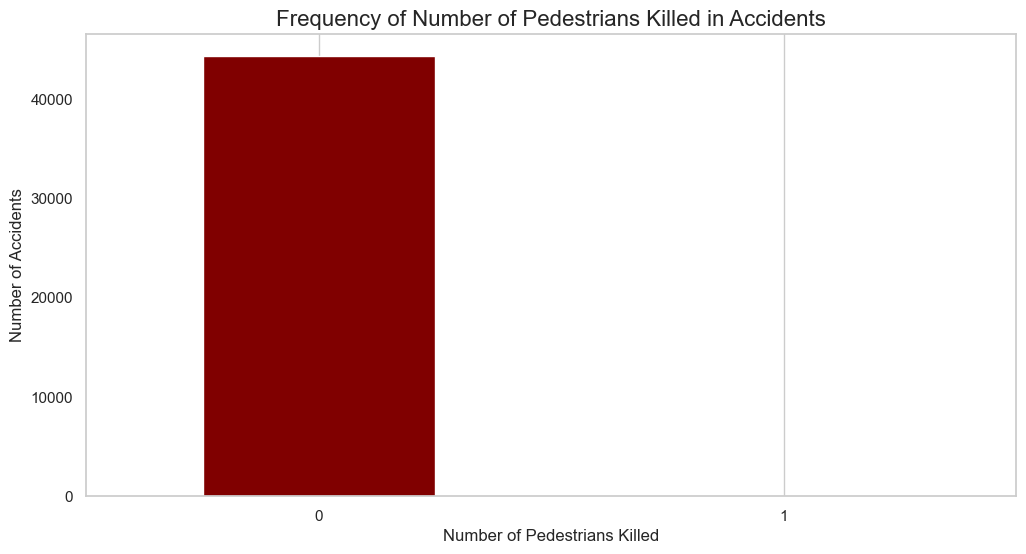

In [77]:
# Frequency of the number of pedestrians injured
pedestrian_injured_counts = collision_data['NUMBER OF PEDESTRIANS INJURED'].value_counts().sort_index()
# Plotting the frequency of pedestrians injured
plt.figure(figsize=(12, 6))
pedestrian_injured_counts.plot(kind='bar', color='green')
plt.title('Frequency of Number of Pedestrians Injured in Accidents', fontsize=16)
plt.xlabel('Number of Pedestrians Injured', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Frequency of the number of pedestrians killed
pedestrian_killed_counts = collision_data['NUMBER OF PEDESTRIANS KILLED'].value_counts().sort_index()
# Plotting the frequency of pedestrians killed
plt.figure(figsize=(12, 6))
pedestrian_killed_counts.plot(kind='bar', color='maroon')
plt.title('Frequency of Number of Pedestrians Killed in Accidents', fontsize=16)
plt.xlabel('Number of Pedestrians Killed', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



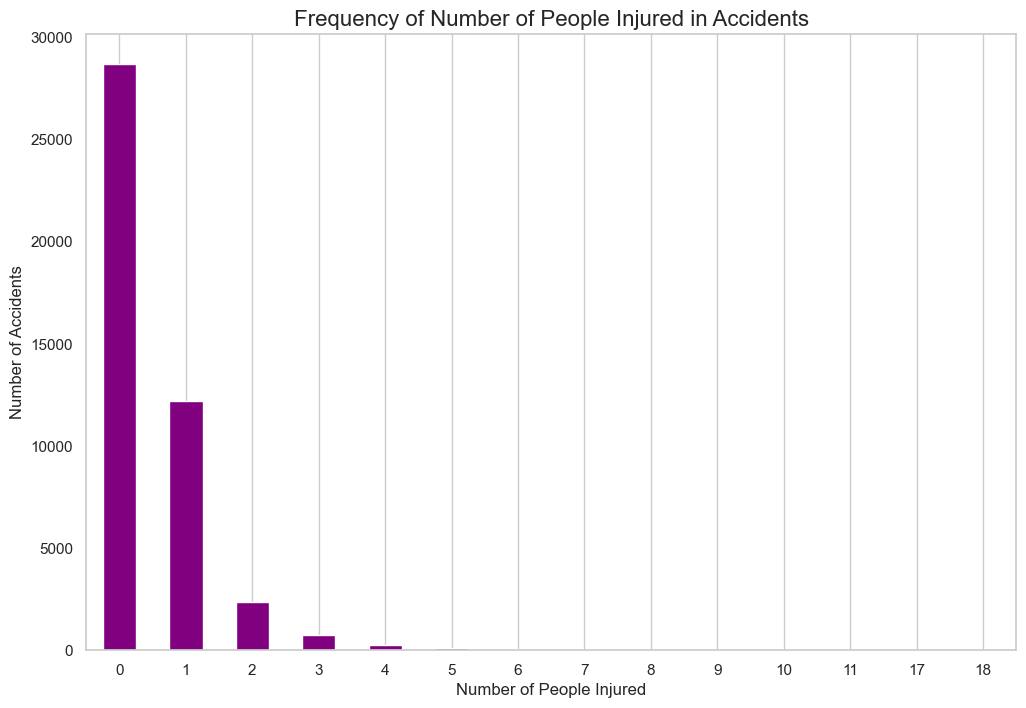

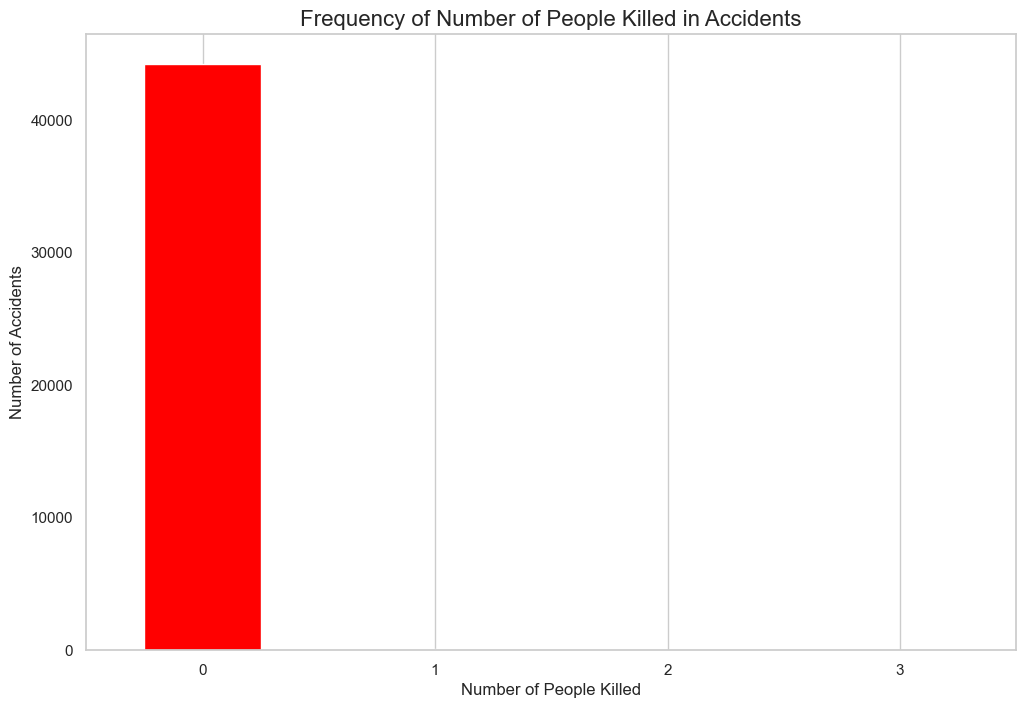

In [78]:
# Frequency of the number of people injured
injury_counts = collision_data['NUMBER OF PERSONS INJURED'].value_counts().sort_index()
# Plotting the frequency of injuries
plt.figure(figsize=(12, 8))
injury_counts.plot(kind='bar', color='purple')
plt.title('Frequency of Number of People Injured in Accidents', fontsize=16)
plt.xlabel('Number of People Injured', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Frequency of the number of people killed
fatality_counts = collision_data['NUMBER OF PERSONS KILLED'].value_counts().sort_index()
# Plotting the frequency of fatalities
plt.figure(figsize=(12, 8))
fatality_counts.plot(kind='bar', color='red')
plt.title('Frequency of Number of People Killed in Accidents', fontsize=16)
plt.xlabel('Number of People Killed', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


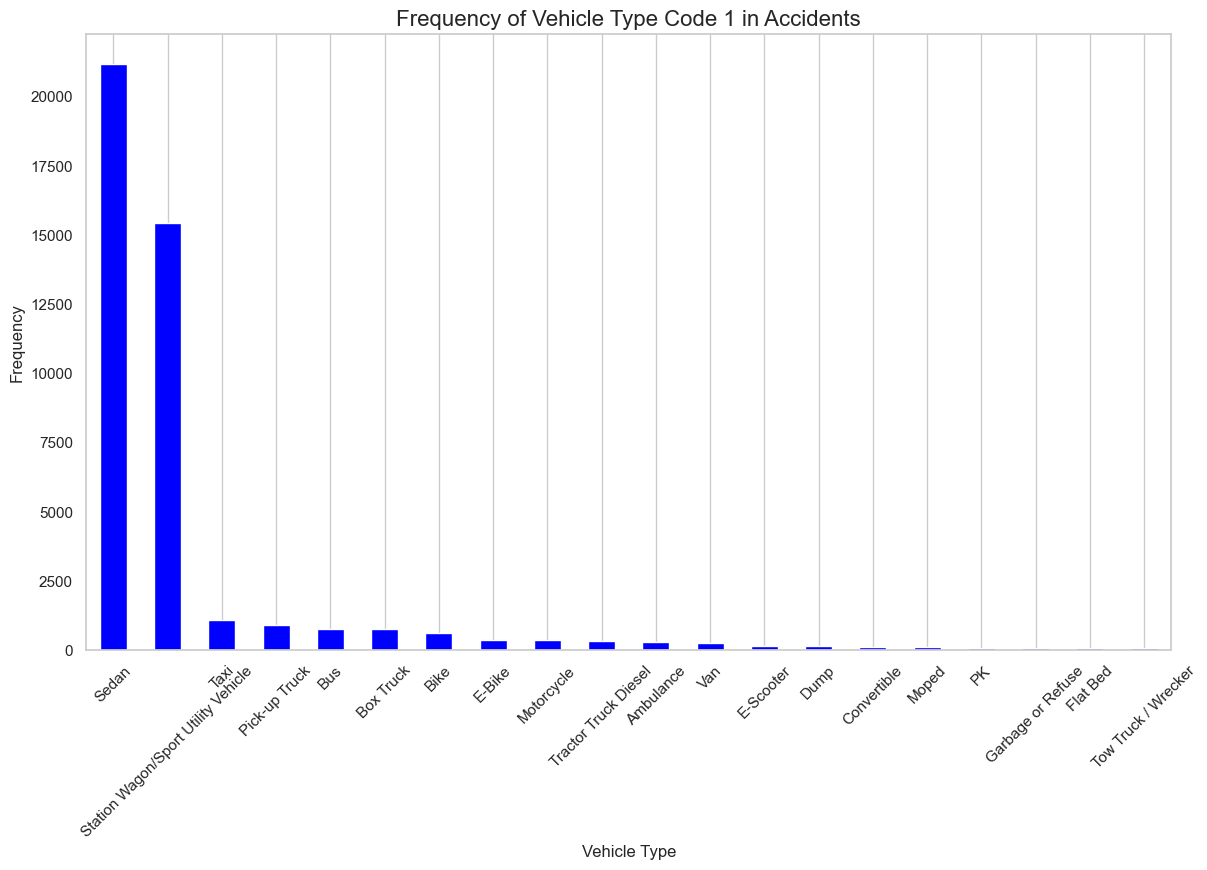

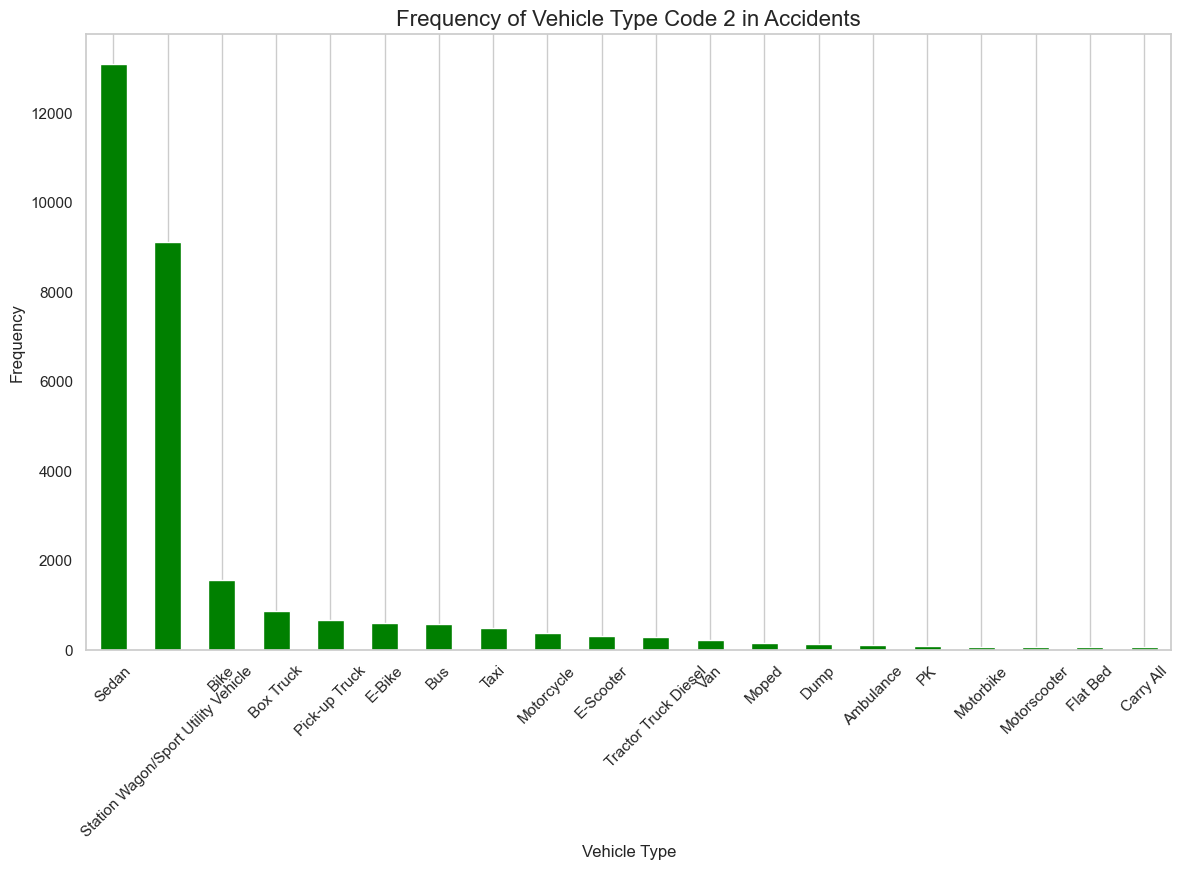

In [79]:
# Frequency of vehicle types for 'VEHICLE TYPE CODE 1'
vehicle_type_1_counts = collision_data['VEHICLE TYPE CODE 1'].value_counts()
# Plotting the frequency of Vehicle Type Code 1
plt.figure(figsize=(14, 8))
vehicle_type_1_counts.head(20).plot(kind='bar', color='blue')  # Top 20 types
plt.title('Frequency of Vehicle Type Code 1 in Accidents', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Frequency of vehicle types for 'VEHICLE TYPE CODE 2'
vehicle_type_2_counts = collision_data['VEHICLE TYPE CODE 2'].value_counts()
# Plotting the frequency of Vehicle Type Code 2
plt.figure(figsize=(14, 8))
vehicle_type_2_counts.head(20).plot(kind='bar', color='green')  # Top 20 types
plt.title('Frequency of Vehicle Type Code 2 in Accidents', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
